# Tarea 3

#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

Fecha de entrega: Domingo 22 de junio 

Alan Badillo Salas

**1.** Guarde en un Dataframe los datos de los precios de las acciones de Tesla (*TSLA.csv* en Github) y realice lo siguiente:

* Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2020.

* Obtenga las gráficas de las series de tiempo de cada año utilizando subplots.

* Obtenga las gráficas de caja por mes de los precios de cierre del 2022. 

* ¿Los precios de cierre de todo el 2022 se distribuyen normalmente? Justifique su respuesta.

In [99]:
import pandas

tesla = pandas.read_csv("tesla.csv", index_col=0, parse_dates=True)

tesla.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [100]:
tesla.sort_values(by="Close", ascending=False).head(1)

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-11-04,411.470001,414.496674,405.666656,409.970001,409.970001


In [101]:
tesla.sort_values(by="Close", ascending=True).head(1)

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333


<Axes: xlabel='Date'>

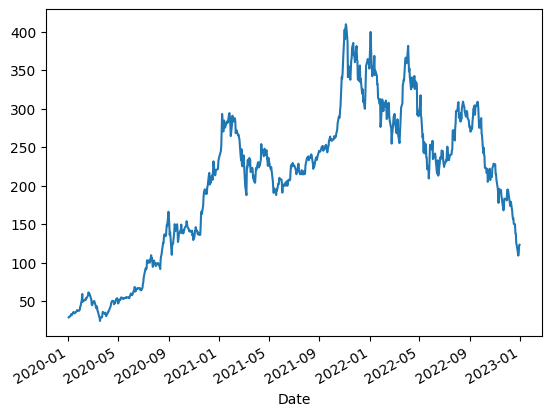

In [102]:
tesla["Close"].plot()

Close    Axes(0.125,0.11;0.775x0.77)
dtype: object

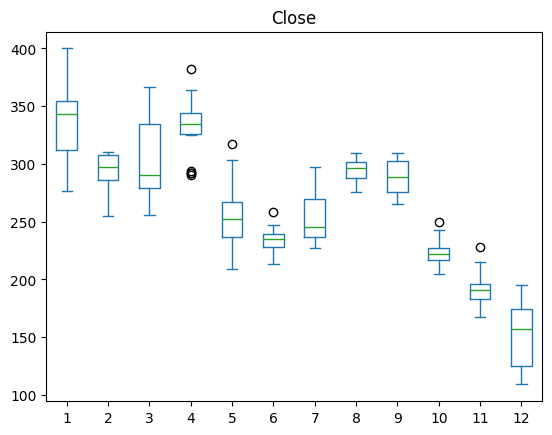

In [103]:
tesla["mes"] = tesla.index.map(lambda fecha: fecha.month)
tesla["anio"] = tesla.index.map(lambda fecha: fecha.year)

tesla[tesla["anio"] == 2022][["mes", "Close"]].plot.box("mes")

<Axes: ylabel='Frequency'>

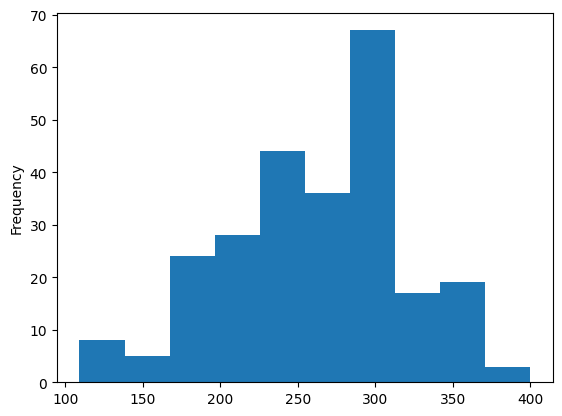

In [104]:
tesla[tesla["anio"] == 2022]["Close"].plot.hist()

In [105]:
tesla[tesla["anio"] == 2022][["Close"]].skew()

Close   -0.307273
dtype: float64

In [106]:
tesla[tesla["anio"] == 2022][["Close"]].kurt()

Close   -0.223269
dtype: float64

Los precios del $2022$ no parecen distribuirse de forma normal, tienen un ligero sesgo y curtosis negativa.

In [107]:
from scipy.stats import shapiro

r_value, p_value = shapiro(tesla[tesla["anio"] == 2022][["Close"]])

print(f"r-value: {r_value:.2f}")
print(f"p-value: {p_value:.2f}")

r-value: 0.99
p-value: 0.02


Vemos que el p-value es menor a $0.05$ lo que sugiere rechazar la hipótesis nula $H_0$ de que los datos se distribuyen de forma normal.

**2.** Guarde en un Dataframe los datos de los contaminantes principales de la zona centro de la CDMX durante el año 2021 (*rama2021.xlsx* en Github) y realice lo siguiente:

* Obtenga las gráficas de series de tiempo de los contaminantes.

* Obtenga los histogramas delos contaminantes.

* Obtenga un Dataframe con el resumen de 5 números, asimetría y kurtosis para todos los contaminantes.

* Obtenga los gráficos de caja de los contaminantes. ¿Cuál contaminante fué el que más detectado durante 2021?

* Realice una prueba de contraste de normalidad de los datos.

* De acuerdo a la prueba obtenida anteriormente. ¿Cuál es el coeficiente de correlación apropiado para obtener la correlación entre los contaminantes?

* Obtenga una matríz de correlación de los contaminantes y un mapa de calor. Además, obtenga un Dataframe que muestre la correlación 2 a 2 entre los contaminantes.

* Obtenga un diagrama de dispersión de los 2 contaminantes donde existe más correlación.

* Obtenga una gráfica que muestre todos los diagrama de dispersión entre todos los contaminantes.

* Compruebe si existe correlación entre los contaminantes y los factores meteorológicos contenidos en  *redmet_2021.csv* en Github.

* Escriba son sus conclusiones.



In [108]:
import pandas

rama2021 = pandas.read_csv("rama_2021.csv", index_col=0, parse_dates=True)

rama2021.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2021-01-01,0.417782,5.712963,16.977273,23.261574,29.765494,54.327273,28.594855,1.125912
2021-01-02,0.515087,14.289894,26.782609,42.090426,33.647969,48.196481,23.465409,1.725000
2021-01-03,0.446905,12.328571,22.773256,35.714286,28.135823,39.091988,16.423676,1.548983
2021-01-04,0.580398,22.323040,31.306483,54.418052,28.824532,52.486239,23.160000,3.410019
2021-01-05,0.533105,19.386091,29.376218,49.995204,28.941374,55.916667,22.694444,5.251366


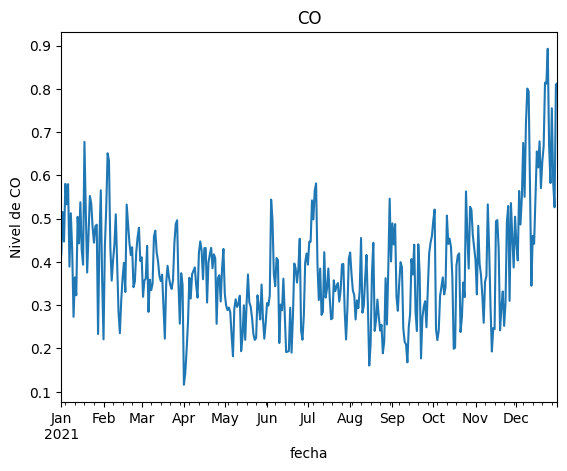

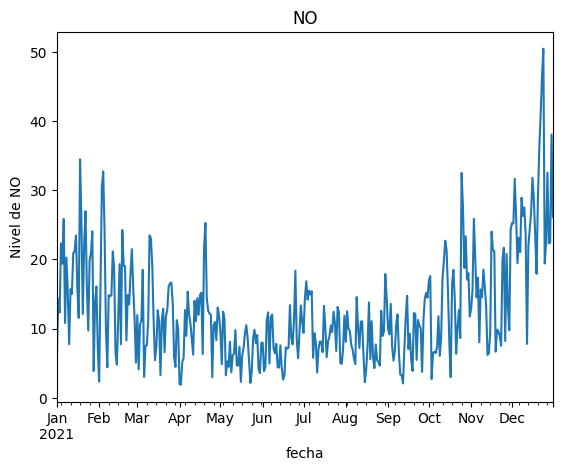

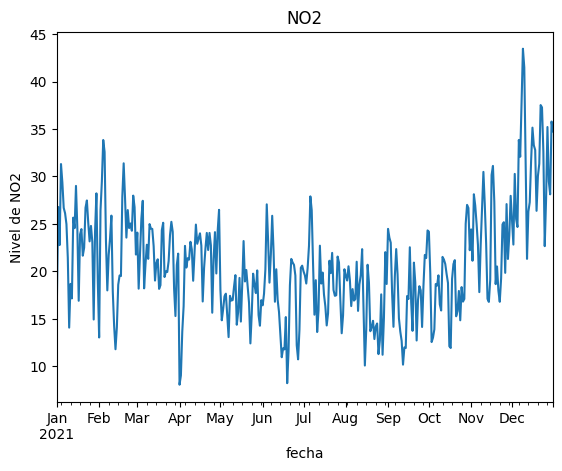

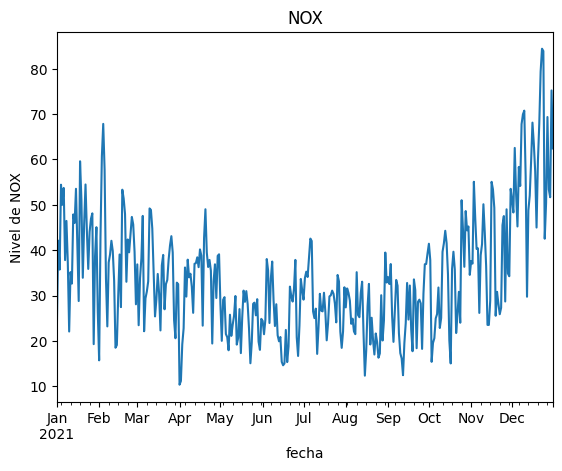

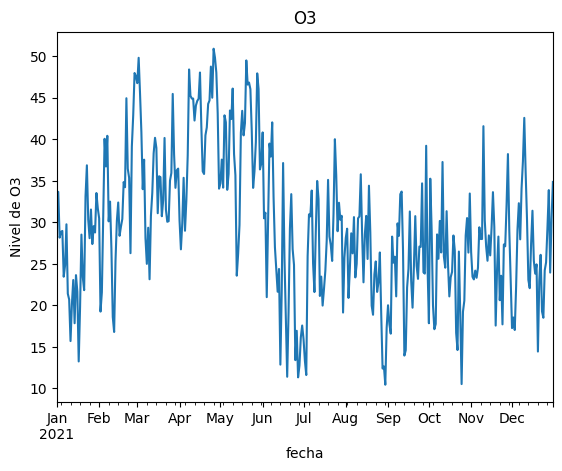

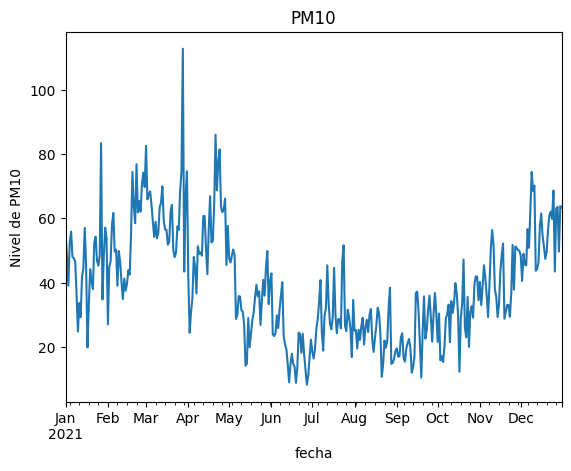

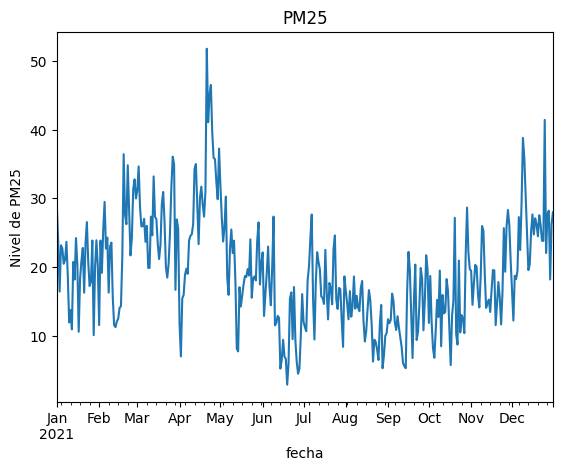

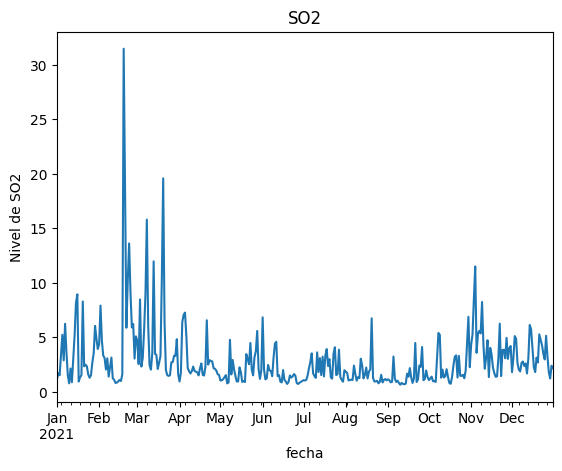

In [109]:
import matplotlib.pyplot as pyplot

for column in rama2021.columns:
    rama2021[column].plot()
    pyplot.title(column)
    pyplot.ylabel(f"Nivel de {column}")
    pyplot.show()

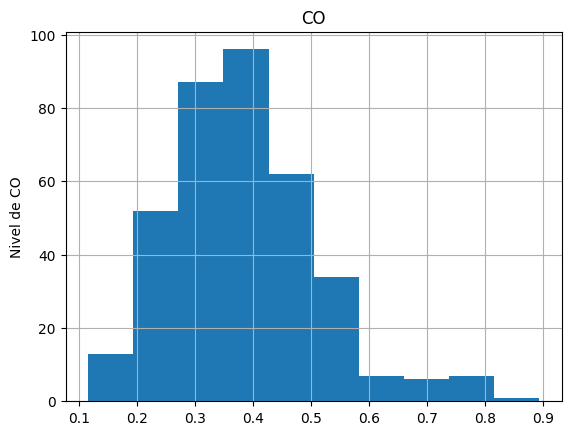

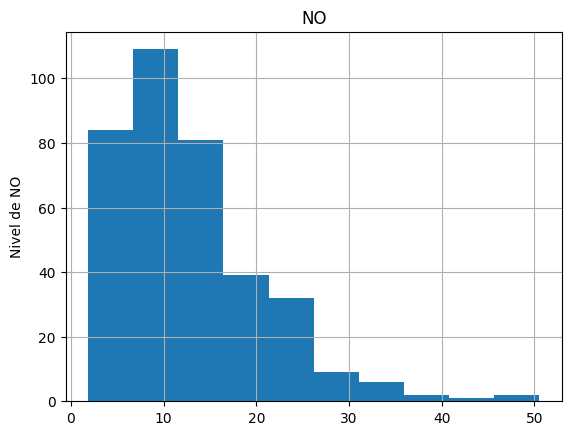

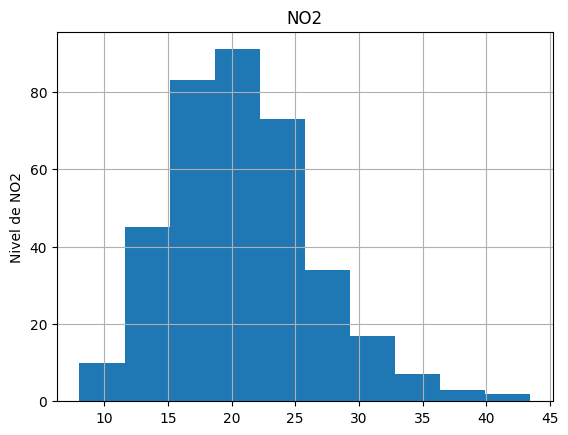

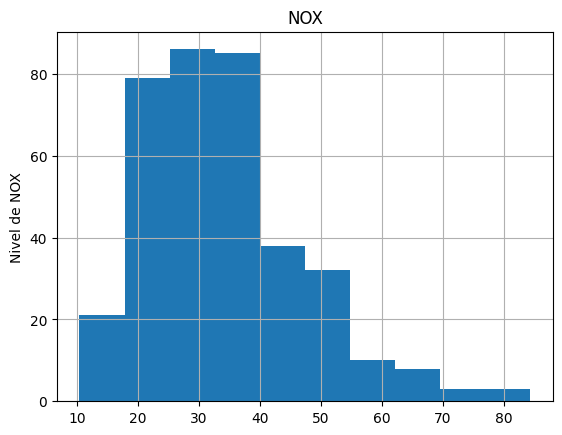

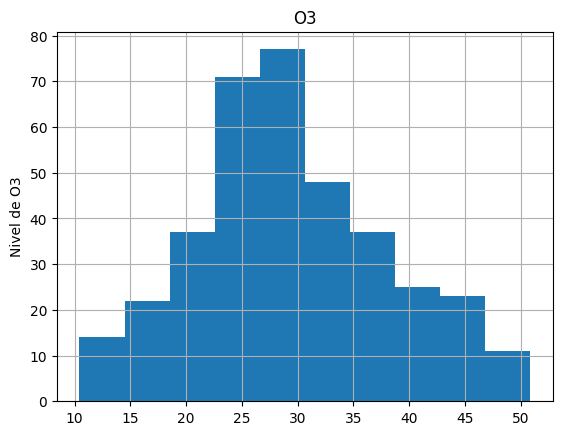

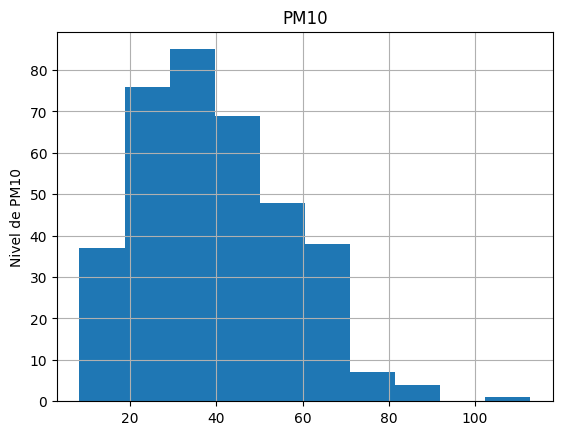

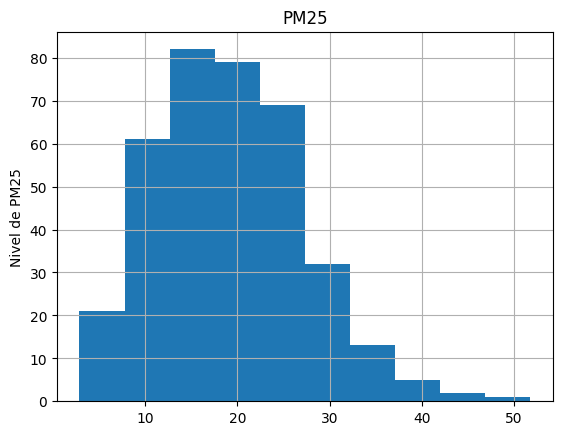

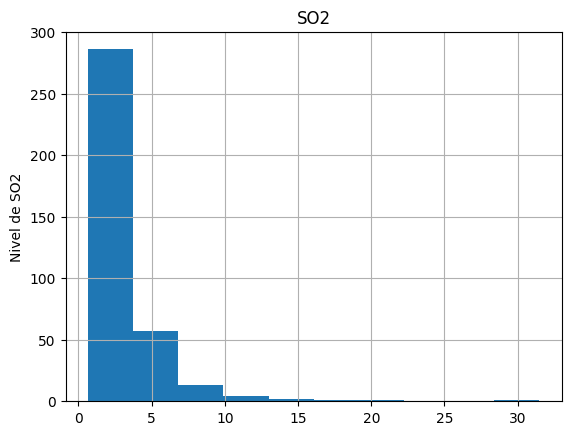

In [110]:
for column in rama2021.columns:
    rama2021[column].hist()
    pyplot.title(column)
    pyplot.ylabel(f"Nivel de {column}")
    pyplot.show()

In [111]:
for column in rama2021.columns:
    print(f"Contaminante: {column}")
    print("-" * 30)
    print(rama2021[column].sample(5))
    print("-" * 30)
    print(f"Asimetría: {rama2021[column].skew()}")
    print(f"Curtosis:  {rama2021[column].kurt()}")
    print("-" * 30)
    print()
    

Contaminante: CO
------------------------------
fecha
2021-11-09    0.367570
2021-02-15    0.363219
2021-10-13    0.453606
2021-12-04    0.486253
2021-11-20    0.295441
Name: CO, dtype: float64
------------------------------
Asimetría: 0.9803378359693984
Curtosis:  1.610452138988229
------------------------------

Contaminante: NO
------------------------------
fecha
2021-01-16    15.865429
2021-09-07    10.628176
2021-08-25     5.138889
2021-12-28    22.344749
2021-05-30     3.553435
Name: NO, dtype: float64
------------------------------
Asimetría: 1.3195268056823903
Curtosis:  2.470978105190348
------------------------------

Contaminante: NO2
------------------------------
fecha
2021-09-15    17.406957
2021-06-05    23.215000
2021-10-13    20.780936
2021-06-17    11.781250
2021-11-15    19.104882
Name: NO2, dtype: float64
------------------------------
Asimetría: 0.6677544286841419
Curtosis:  0.8894470857027419
------------------------------

Contaminante: NOX
---------------------

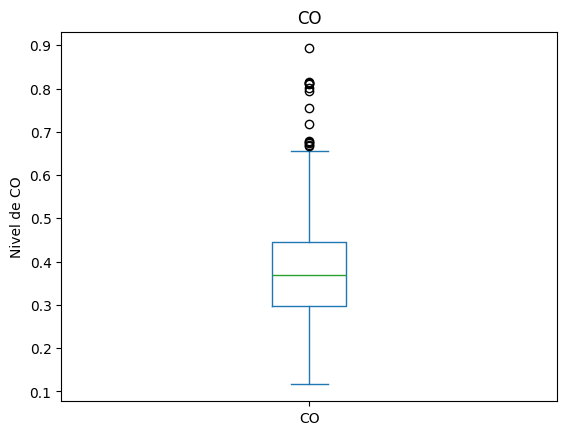

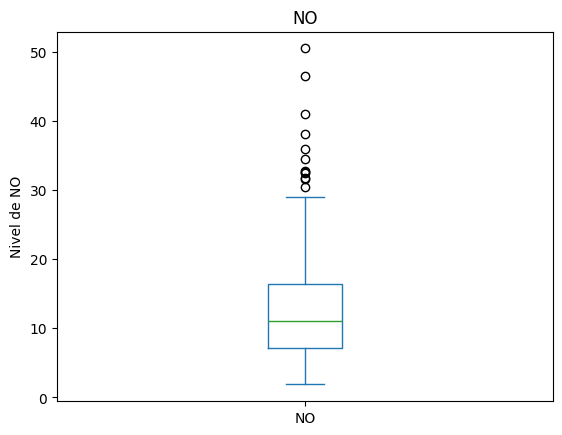

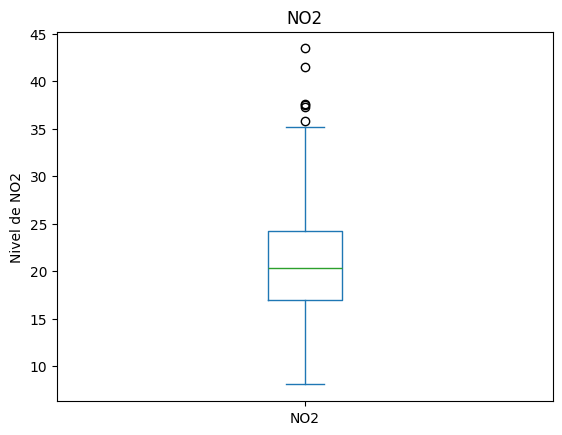

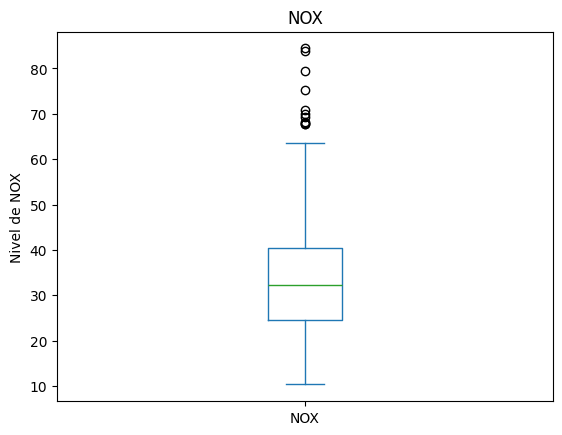

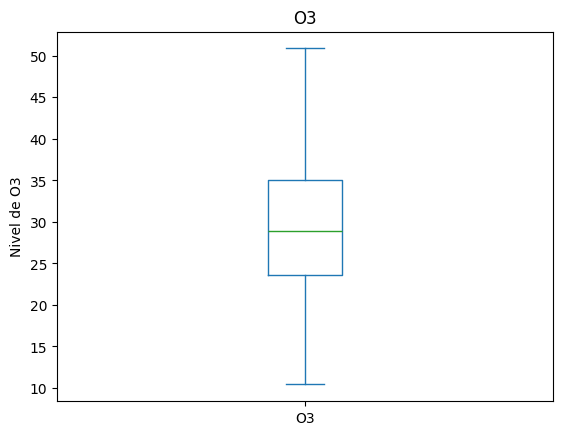

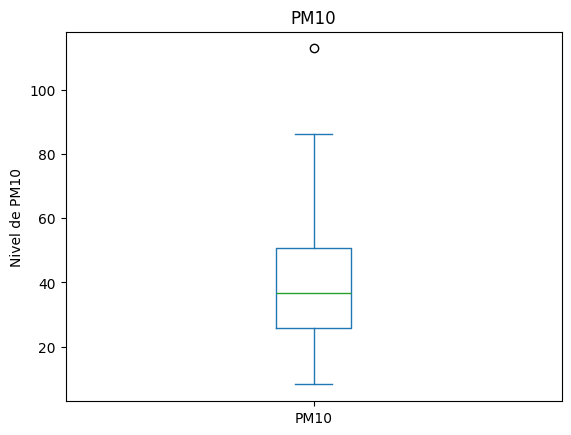

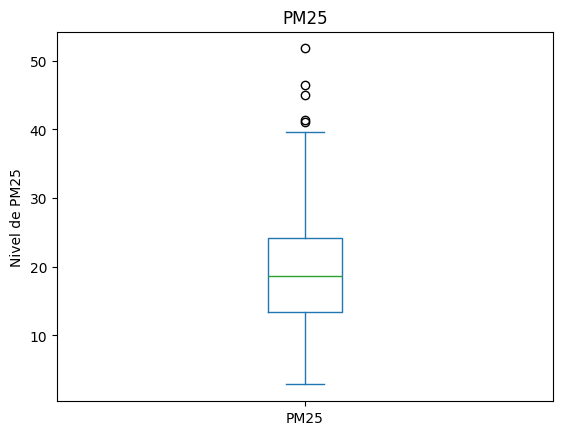

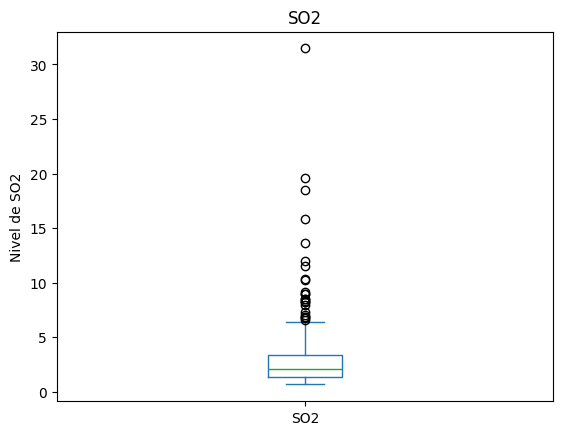

In [112]:
for column in rama2021.columns:
    rama2021[column].plot.box()
    pyplot.title(column)
    pyplot.ylabel(f"Nivel de {column}")
    pyplot.show()
    

Para ver cuál fue el contaminante más detectado podemos normalizar los datos para ver cuál tiene un valor más alto, pero debemos quitar los puntos atípicos primero

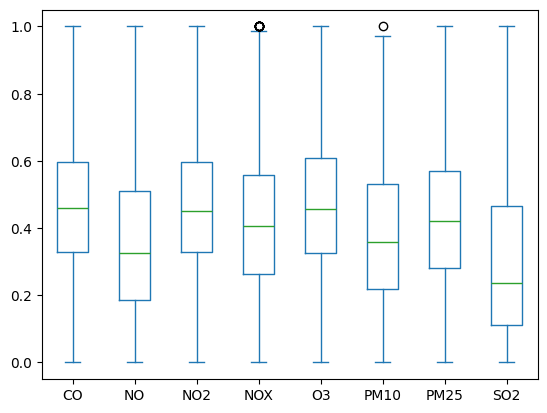

In [113]:
rama2021_normalizado = rama2021.copy()

for column in rama2021.columns:
    x = rama2021_normalizado[column]

    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    xmin = Q1 - 1.5 * IQR
    xmax = Q3 + 1.5 * IQR
    x.loc[x < xmin] = xmin
    x.loc[x > xmax] = xmax

    x = (x - x.min()) / (x.max() - x.min())
    
    rama2021_normalizado[column] = x

rama2021_normalizado.plot.box()
pyplot.show()

Los compuestos más detectados son monóxido de carbono, dióxido de nitrógeno y ozono.

In [116]:
reporte = []

for column in rama2021.columns:
    x = rama2021[column]
    r_value, p_value = shapiro(x)
    reporte.append((column, r_value, p_value, p_value > 0.05))

pandas.DataFrame(reporte, columns=["Contaminante", "r-value", "p-value", "H0"])

,Contaminante,r-value,p-value,H0
0,CO,0.949222,7.010633e-10,False
1,NO,0.907053,3.505852e-14,False
2,NO2,0.975581,7.778483e-06,False
3,NOX,0.944904,2.070274e-10,False
4,O3,0.986353,1.630253e-03,False
5,PM10,0.972192,1.840620e-06,False
6,PM25,0.975785,8.509463e-06,False
7,SO2,0.622303,1.550140e-27,False


Observamos que ningún contaminante acepta la hipótesis nula de normalidad, por lo que asumimos que son no-normales y debemos usar una correlación de Spearman en lugar de Pearson.

In [117]:
rama2021.corr(method="spearman")

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
CO,1.000000,0.843404,0.873391,0.906800,-0.004116,0.504046,0.512779,0.299368
NO,0.843404,1.000000,0.785366,0.954812,-0.132850,0.484106,0.371816,0.295461
NO2,0.873391,0.785366,1.000000,0.924388,0.143831,0.645877,0.630509,0.478446
NOX,0.906800,0.954812,0.924388,1.000000,0.011048,0.607047,0.529378,0.404369
O3,-0.004116,-0.132850,0.143831,0.011048,1.000000,0.539238,0.640220,0.301324
PM10,0.504046,0.484106,0.645877,0.607047,0.539238,1.000000,0.895745,0.611600
PM25,0.512779,0.371816,0.630509,0.529378,0.640220,0.895745,1.000000,0.588893
SO2,0.299368,0.295461,0.478446,0.404369,0.301324,0.611600,0.588893,1.000000


<Axes: >

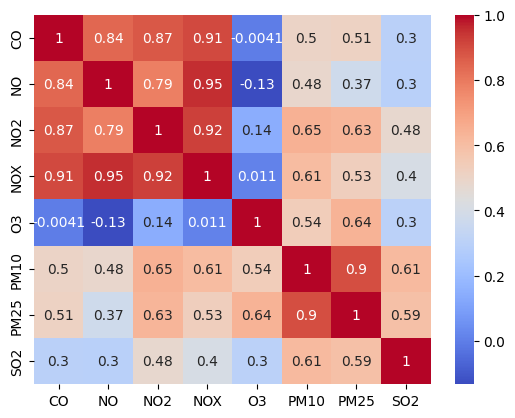

In [120]:
import seaborn

seaborn.heatmap(rama2021.corr(method="spearman"), cmap="coolwarm", annot=True)

In [124]:
import pingouin

pingouin.pairwise_corr(rama2021).sort_values("r", ascending=False)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
8,NO,NOX,pearson,two-sided,365,0.957376,"[0.95, 0.97]",7.277622e-198,3.322e+193,1.000000
13,NO2,NOX,pearson,two-sided,365,0.927193,"[0.91, 0.94]",7.126383e-157,5.886e+152,1.000000
2,CO,NOX,pearson,two-sided,365,0.919823,"[0.9, 0.93]",1.426633e-149,3.25e+145,1.000000
1,CO,NO2,pearson,two-sided,365,0.889872,"[0.87, 0.91]",8.886360e-126,7.287e+121,1.000000
25,PM10,PM25,pearson,two-sided,365,0.883877,"[0.86, 0.9]",7.581649e-122,9.036e+117,1.000000
0,CO,NO,pearson,two-sided,365,0.857711,"[0.83, 0.88]",6.427693e-107,1.326e+103,1.000000
7,NO,NO2,pearson,two-sided,365,0.781486,"[0.74, 0.82]",2.293188e-76,5.994e+72,1.000000
23,O3,PM25,pearson,two-sided,365,0.653953,"[0.59, 0.71]",6.600362e-46,3.644e+42,1.000000
15,NO2,PM10,pearson,two-sided,365,0.616943,"[0.55, 0.68]",1.174811e-39,2.345e+36,1.000000
16,NO2,PM25,pearson,two-sided,365,0.585406,"[0.51, 0.65]",5.971849e-35,5.153e+31,1.000000


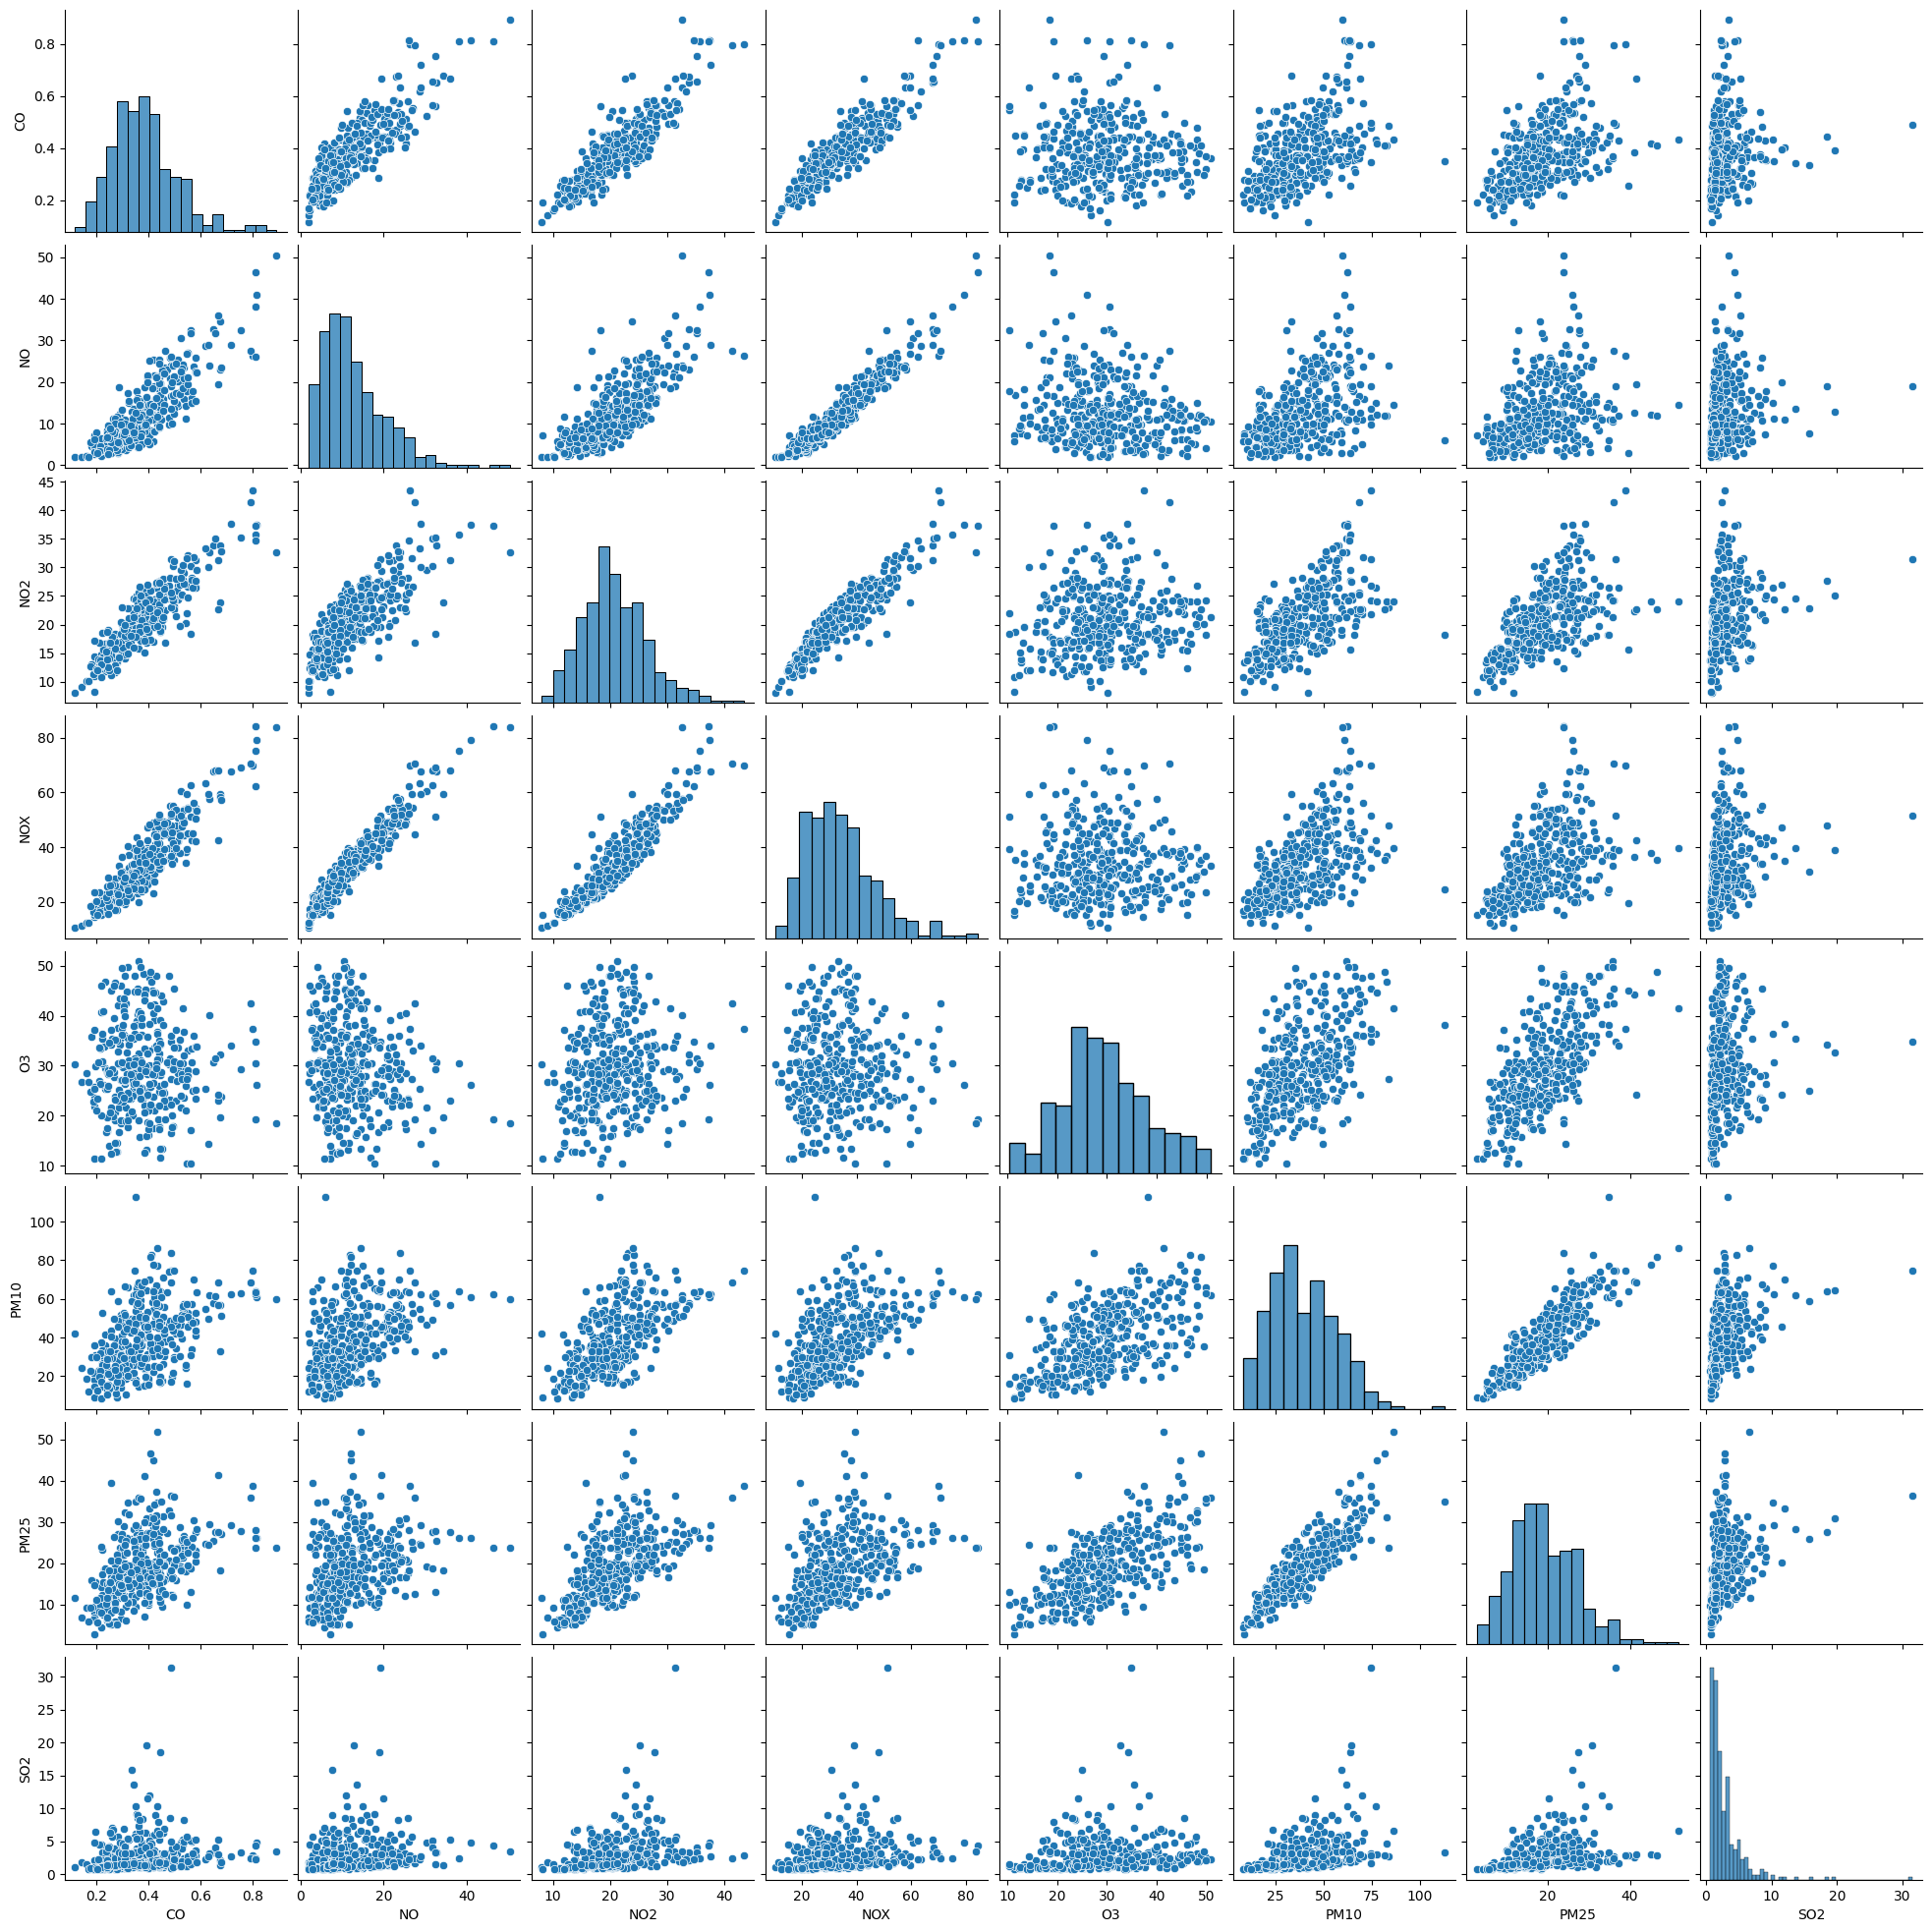

In [125]:
seaborn.pairplot(rama2021)

In [127]:
redmet2021 = pandas.read_csv("redmet_2021.csv", index_col=0, parse_dates=True)

redmet2021.head()

,RH,TMP,WDR,WSP
fecha,,,,
2021-01-01,32.645714,12.519203,162.673611,2.697743
2021-01-02,29.782353,12.918297,166.820467,1.954039
2021-01-03,32.780488,14.381852,179.656881,1.960917
2021-01-04,36.739563,13.840727,190.878403,1.705808
2021-01-05,39.845996,13.591215,163.173832,1.834019


In [131]:
datos2021 = rama2021.join(redmet2021)

datos2021.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,RH,TMP,WDR,WSP
fecha,,,,,,,,,,,,
2021-01-01,0.417782,5.712963,16.977273,23.261574,29.765494,54.327273,28.594855,1.125912,32.645714,12.519203,162.673611,2.697743
2021-01-02,0.515087,14.289894,26.782609,42.090426,33.647969,48.196481,23.465409,1.725000,29.782353,12.918297,166.820467,1.954039
2021-01-03,0.446905,12.328571,22.773256,35.714286,28.135823,39.091988,16.423676,1.548983,32.780488,14.381852,179.656881,1.960917
2021-01-04,0.580398,22.323040,31.306483,54.418052,28.824532,52.486239,23.160000,3.410019,36.739563,13.840727,190.878403,1.705808
2021-01-05,0.533105,19.386091,29.376218,49.995204,28.941374,55.916667,22.694444,5.251366,39.845996,13.591215,163.173832,1.834019


<Axes: >

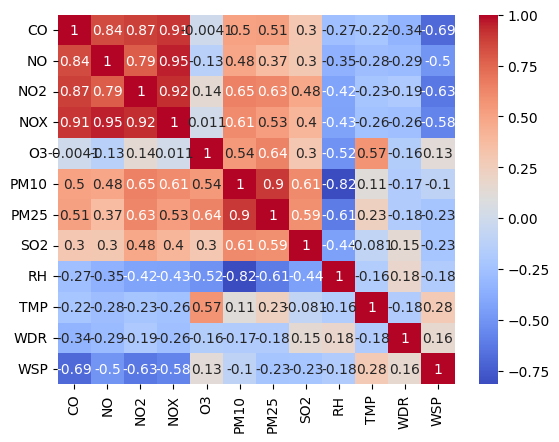

In [132]:
seaborn.heatmap(datos2021.corr(method="spearman"), cmap="coolwarm", annot=True)

Observamos que hay alta correlación negativa entre algunos compuestos contaminantes y factores metereológicos como la humedad relativa (*RH*) y el contaminante *PM10* que tiene una correlación de -0.82.

**Conclusiones**

Al analizar los contaminantes hemos observado que estos no se se comportan de forma normal, por lo que hemos analizado la correlación entre estos mediante el método de Spearman.

Además al cruzar la información con los factores metereológicos, vemos que cuando el valor de los factores metereológicos aumenta como la humedad relativa (*RH*), la temperatura (*TMP*), la dirección del viento (*WDR*) y la velocidad del viento (*WSP*) aumentan, algunos contaminantes disminuyen (en correlación negativa).

Esto nos muestra que la contaminanción aumenta cuando los factores meteorológicos son normales y nos permite precisar hipótesis como que aumentar la humedad relativa podría ayudar a disminuir la contaminación. Sin embargo, esto no es concluyente ni debe ser causal, por ejemplo, podría ser que las lecturas se alteren con más humedad.